In [10]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn import train_test_split

In [11]:
combats = pd.read_csv('./Python/Data/combats.csv')
pokemons = pd.read_csv('./Python/Data/pokemon.csv')
tests = pd.read_csv('./Python/Data/tests.csv')

In [45]:
pokemons.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [13]:
pokemons.head(15)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [14]:
#merge full dataset
half_data = combats.merge(pokemons,how='left', left_on=['First_pokemon'], right_on=['#'])
full_data = half_data.merge(pokemons,how='left', left_on=['Second_pokemon'], right_on=['#'],suffixes=('_1','_2'))

In [15]:
full_data.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner', '#_1', 'Name_1',
       'Type 1_1', 'Type 2_1', 'HP_1', 'Attack_1', 'Defense_1', 'Sp. Atk_1',
       'Sp. Def_1', 'Speed_1', 'Generation_1', 'Legendary_1', '#_2', 'Name_2',
       'Type 1_2', 'Type 2_2', 'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2',
       'Sp. Def_2', 'Speed_2', 'Generation_2', 'Legendary_2'],
      dtype='object')

In [16]:
full_data.head()

,First_pokemon,Second_pokemon,Winner,#_1,Name_1,Type 1_1,Type 2_1,HP_1,Attack_1,Defense_1,...,Type 1_2,Type 2_2,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Generation_2,Legendary_2
0,266,298,298,266,Larvitar,Rock,Ground,50,64,50,...,Grass,Dark,70,70,40,60,40,60,3,False
1,702,701,701,702,Virizion,Grass,Fighting,91,90,72,...,Rock,Fighting,91,129,90,72,90,108,5,True
2,191,668,668,191,Togetic,Fairy,Flying,55,40,85,...,Psychic,NaN,75,75,75,125,95,40,5,False
3,237,683,683,237,Slugma,Fire,NaN,40,40,40,...,Dragon,NaN,77,120,90,60,90,48,5,False
4,151,231,151,151,Omastar,Rock,Water,70,60,125,...,Bug,Rock,20,10,230,10,230,5,2,False


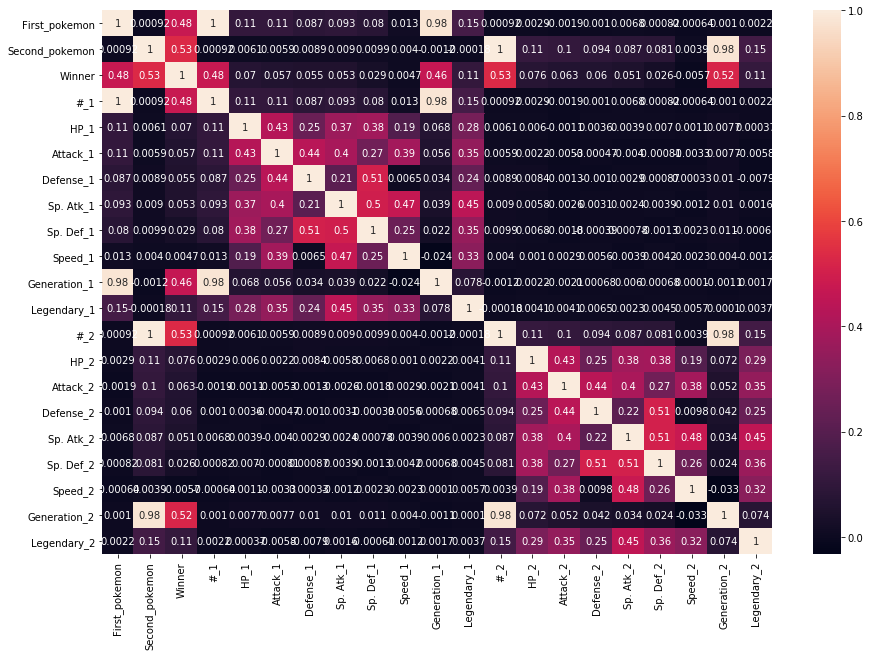

In [17]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(full_data.corr(), annot=True, ax=ax)

In [46]:
np.unique(full_data['Generation_1'])

array([1, 2, 3, 4, 5, 6])

In [18]:
pred_win = full_data.loc[:,'Winner']
pred_win.head()

0    298
1    701
2    668
3    683
4    151
Name: Winner, dtype: int64

In [59]:
'''gen_ord_map_p1 = {'p1_gen1': 1, 'p1_gen2': 2, 'p1_gen3': 3, 
               'p1_gen4': 4, 'p1_gen5': 5, 'p1_gen6': 6}'''

gen_ord_map_p1 = {1 : 'p1_gen1', 2 : 'p1_gen2', 3:'p1_gen3', 
            4: 'p1_gen4', 5:'p1_gen5', 6: 'p1_gen6'}
full_data['genlabel'] = full_data['Generation_1'].map(gen_ord_map_p1)

In [62]:
full_data[['genlabel','Generation_1']].head()

,genlabel,Generation_1
0,p1_gen2,2
1,p1_gen5,5
2,p1_gen2,2
3,p1_gen2,2
4,p1_gen1,1


In [82]:
# encode all type values 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# map generation labels
gen1 = LabelEncoder()
gen1_labels = gen1.fit_transform(full_data['Generation_1'])
full_data['Gen1_label'] = gen1_labels

# map legendary status
leg1 = LabelEncoder()
leg1_labels = leg1.fit_transform(full_data['Legendary_1'])
full_data['Leg1_label'] = leg1_labels

In [91]:
# generate 'generation' columns
generation = OneHotEncoder()
gen_features_arr = generation.fit_transform(full_data[['Generation_1']]).toarray()
gen_feature_labels = ['P1_Gen_' + str(g_label) for g_label in gen1.classes_]
gen_features = pd.DataFrame(gen_features_arr, columns = gen_feature_labels)

# generate 'legendary' columns
legend = OneHotEncoder()
leg_features_arr = legend.fit_transform(full_data[['Leg1_label']]).toarray()
leg_feature_labels = ['Legend_'+str(l_label) for l_label in leg1.classes_]
leg_features = pd.DataFrame(leg_features_arr, columns = leg_feature_labels)

/Users/satrya/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/satrya/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

In [95]:
poke1 = pd.concat([full_data, gen_features, leg_features])

/Users/satrya/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [97]:
poke1.columns

Index(['#_1', '#_2', 'Attack_1', 'Attack_2', 'Defense_1', 'Defense_2',
       'First_pokemon', 'Gen1_label', 'Generation_1', 'Generation_2', 'HP_1',
       'HP_2', 'Leg1_label', 'Legend_False', 'Legend_True', 'Legendary_1',
       'Legendary_2', 'Name_1', 'Name_2', 'P1_Gen_1', 'P1_Gen_2', 'P1_Gen_3',
       'P1_Gen_4', 'P1_Gen_5', 'P1_Gen_6', 'Second_pokemon', 'Sp. Atk_1',
       'Sp. Atk_2', 'Sp. Def_1', 'Sp. Def_2', 'Speed_1', 'Speed_2', 'Type 1_1',
       'Type 1_2', 'Type 2_1', 'Type 2_2', 'Winner', 'genlabel', 'leg1'],
      dtype='object')

In [19]:
features = full_data.drop(['Winner','Name_1','#_1','Type 1_1','Type 2_1','Name_2','#_2','Type 1_2','Type 2_2'], axis=1)
features.columns

Index(['First_pokemon', 'Second_pokemon', 'HP_1', 'Attack_1', 'Defense_1',
       'Sp. Atk_1', 'Sp. Def_1', 'Speed_1', 'Generation_1', 'Legendary_1',
       'HP_2', 'Attack_2', 'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2',
       'Generation_2', 'Legendary_2'],
      dtype='object')

In [20]:
features.Legendary_1 = features.Legendary_1.astype(int)
features.Legendary_2 = features.Legendary_2.astype(int)


In [43]:
features.head()

,First_pokemon,Second_pokemon,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Generation_2,Legendary_2
0,266,298,50,64,50,45,50,41,2,0,70,70,40,60,40,60,3,0
1,702,701,91,90,72,90,129,108,5,1,91,129,90,72,90,108,5,1
2,191,668,55,40,85,80,105,40,2,0,75,75,75,125,95,40,5,0
3,237,683,40,40,40,70,40,20,2,0,77,120,90,60,90,48,5,0
4,151,231,70,60,125,115,70,55,1,0,20,10,230,10,230,5,2,0


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(features)


/Users/satrya/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/satrya/miniconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
X[0]

array([-0.58591731, -0.45705427, -0.75432051, -0.4625508 , -0.76650973,
       -0.85184489, -0.79083415, -0.92920021, -0.80005088, -0.29831605,
        0.03575944, -0.27874704, -1.08140504, -0.38794617, -1.15026223,
       -0.2844285 , -0.20631869, -0.29895164])

In [22]:
X_train = X
y_train = pred_win.values

In [23]:
# data correlation
#f,ax = plt.subplots(figsize=(18,18))
#sns.heatmap(pokemons.corr(), annot=True, linewidths=.5, fmt='.1f',ax=ax)

In [24]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam 
from keras.callbacks import TensorBoard
import numpy as np 
import pandas as pd

# define model
in_shape = (18,)
'''model = Sequential([
    Dense(18, input_shape=im_shape),
    Dropout(0.1),
    Dense(128, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])'''
model = Sequential()
model.add(Dense(18, input_shape=in_shape, activation="relu"))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(
    loss='mean_squared_error',
    optimizer = Adam(lr=0.009),
    metrics=['accuracy']
)


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 152       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 503
Trainable params: 503
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(
    X_train, y_train, batch_size=10,
    epochs= 5
)

Epoch 1/5
50000/50000 [==============================] - 6s 114us/step - loss: 219808.2023 - acc: 7.4000e-04
Epoch 2/5
50000/50000 [==============================] - 6s 110us/step - loss: 219808.1926 - acc: 7.4000e-04
Epoch 3/5
50000/50000 [==============================] - 6s 113us/step - loss: 219808.1926 - acc: 7.4000e-040s - loss: 219823.
Epoch 4/5
50000/50000 [==============================] - 6s 110us/step - loss: 219808.1928 - acc: 7.4000e-04
Epoch 5/5
50000/50000 [==============================] - 6s 110us/step - loss: 219808.1926 - acc: 7.4000e-04


In [26]:
test = X_train[0:10]
test = test.reshape((10,18))

In [27]:
pred = model.predict(test)

In [28]:
pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 152       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 503
Trainable params: 503
Non-trainable params: 0
_________________________________________________________________
